# 4. Gradient Boosting and Loss Functions

In this section, we will study the behaviour of the gradient descent algorithm and some loss functions not covered in the course.

`(a)` [1/2 point] In its standard version, the gradient boosting uses the mean squared error (MSE) as a loss function. Let us $r = y - \hat{y}$, the residual between the ground truth value $y$ and a prediction $\hat{y}$. Plot the MSE as a function of $r$.

To plot the Mean Squared Error (MSE) as a function of the residual $ r $ (where $ r = y - \hat{y} $), we first understand the MSE formula in this context. MSE measures the average squared difference between actual values and predicted values, but when focusing on a single prediction and its error, it simplifies to the square of the residual:

$ \text{MSE} = r^2 $

Here, $ r $ is $ y - \hat{y} $, and MSE simplifies to $ r^2 $ because it is the only term in the averaging sum for this single prediction scenario.

Let's plot $ r^2 $ against $ r $ to visualize how MSE changes with the residual $ r $:

In [1]:
using Plots  # Ensure Plots.jl is installed and loaded
using LaTeXStrings

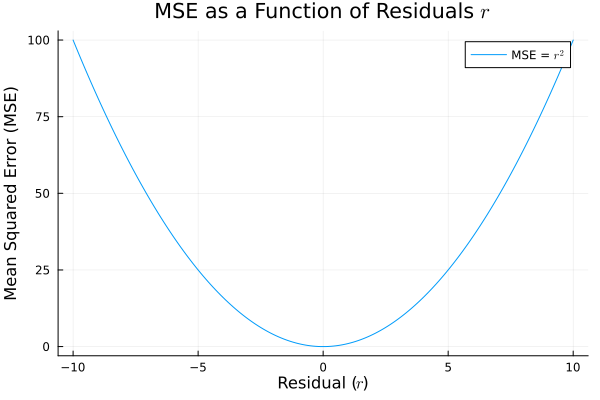

In [2]:
# Define the residual range
r = -10:0.1:10

# Calculate MSE for each residual value
mse = @. r ^ 2

# Plot MSE against residuals
plot(r, mse
    , label="MSE = " * L"r^2", title="MSE as a Function of Residuals " * L"r"
    , xlabel="Residual (" * L"r" * ")", ylabel="Mean Squared Error (MSE)"
    , legend=:topright
)

To define a range for $ r $, compute the MSE for each $ r $ value by squaring $ r $, and then plot these values. The plot will show a parabolic curve indicating that MSE increases quadratically as the absolute value of the residual increases, which reflects the nature of squaring residuals: the further away the prediction is from the actual value, the larger the error squared becomes.

You will see a plot illustrating how MSE varies with the residual $ r $, demonstrating that the error penalty increases exponentially as predictions deviate further from true values.